In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
# Importing Necassary Library
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Input, Dense
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# To ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is used')
else:
     print('gpu is Unavailable!')

In [ ]:
# Load And Explore the Dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'

In [ ]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)
# Display the Class Names
classes = ['fire', 'nofire']
print('Number of classes:', {num_classes})
print(classes)

In [ ]:
# Let's visualize the image in dataset
plt.figure(figsize = (12, 10))
for i in range(10):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize = (12, 10))
for i in range(10):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
#Preprocessing
#Image Dimension And batch Size

img_width,  img_height = 150,150
batch_size = 64

#Data Generators
train_datagen = ImageDataGenerator( rescale=1./255,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode ='binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
# map the indices
class_mapping = train_generator.class_indices
print(class_mapping)

{'fire': 0, 'nofire': 1}


In [ ]:
# Let's Build a CNN model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,563,713 (36.48 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)


Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 709s 24s/step - accuracy: 0.5600 - loss: 0.8413 - val_accuracy: 0.6510 - val_loss: 0.5869
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.6719 - loss: 0.5528 - val_accuracy: 0.6016 - val_loss: 0.6896
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 685s 23s/step - accuracy: 0.6345 - loss: 0.6185 - val_accuracy: 0.7266 - val_loss: 0.5382
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.6875 - loss: 0.5462 - val_accuracy: 0.7214 - val_loss: 0.5254
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 723s 24s/step - accuracy: 0.7564 - loss: 0.5069 - val_accuracy: 0.7188 - val_loss: 0.5771
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.7812 - loss: 0.4198 - val_accuracy: 0.7031 - val_loss: 0.6415
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 665s 23s/step - accuracy: 0.7681 - loss: 0.4838 - val_accuracy: 0.7786 - val_loss: 0.4529
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.8750 - loss: 0.3072 - val_accuracy: 0.7474

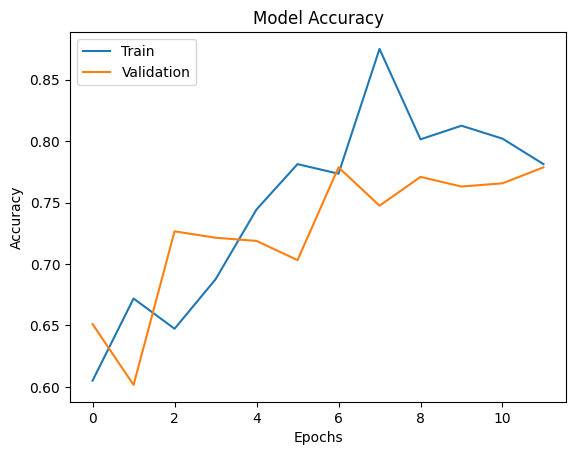

In [42]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

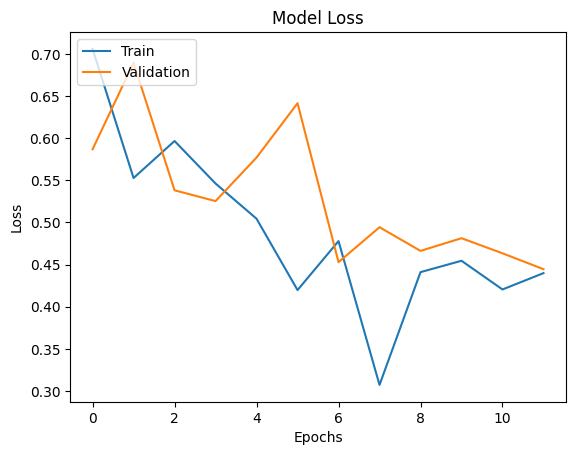

In [43]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
# Evaluate the model using test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 116s 18s/step - accuracy: 0.8012 - loss: 0.4035
Test Loss: 0.3739
Test Accuracy: 0.8151


In [45]:
# Save the model
model.save('FFD.keras')

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = classes[1]
  else:
    predicted_class = classes[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()


In [47]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


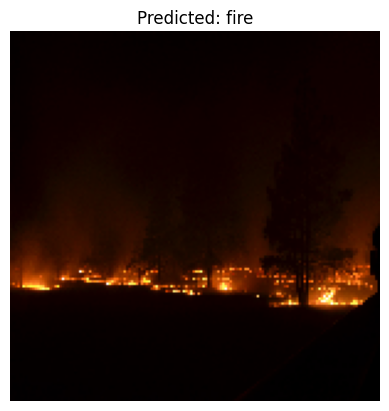

In [48]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27002088114_aa5cc7f353_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


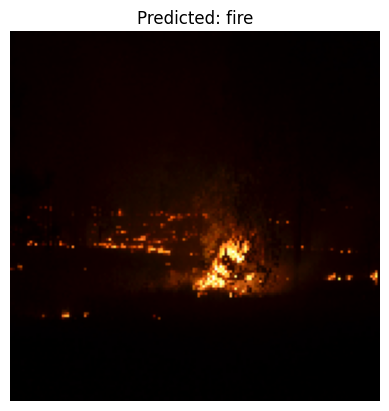

In [49]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27335331950_39b376eddd_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


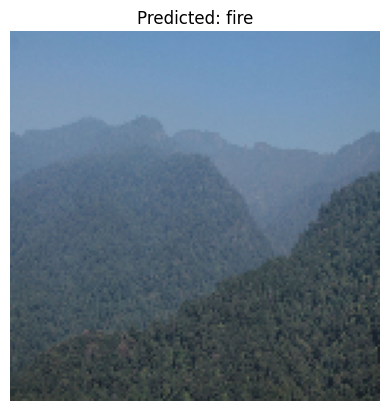

In [50]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/33696343816_811bd98925_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


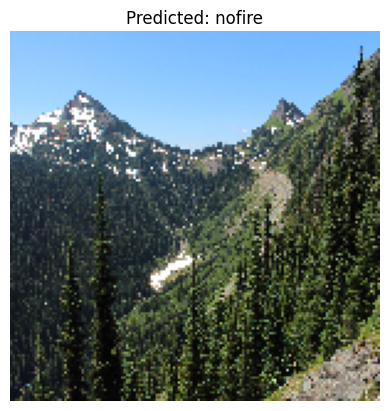

In [51]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/49200563427_e5295b4455_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


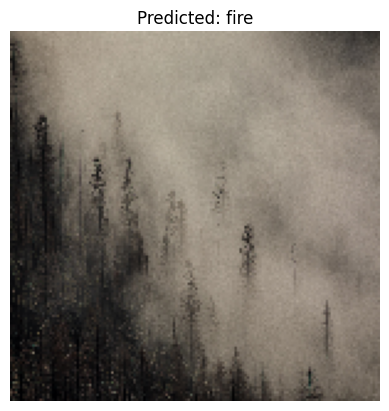

In [52]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/45636031272_8408d32834_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


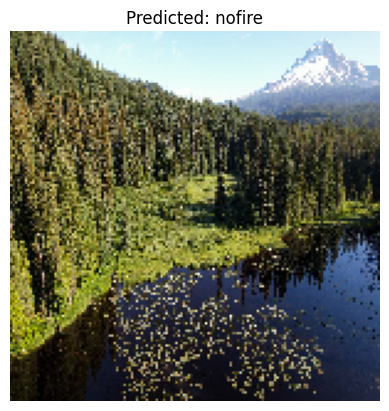

In [53]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/52359026765_4a4ba189c8_o.jpg')